<a href="https://colab.research.google.com/github/SAMashiyane/organophosphate_pro/blob/main/pycaret_organph_outcome_v1_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">
    <h1 align="center">*Pycartet* for outcome</h1>
    <h3 align="center">Investigating outcome </h3>
</div>

Test for runtime system(GPU OR CPU)

In [2]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import os
import glob
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [4]:
import logging, sys
logging.disable(sys.maxsize)

In [6]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **CLASSIFICATION FOR THIS DATA!!**

In [8]:
from pycaret.classification import *


**mount in google drive**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load 

In [10]:
#Let's Read csv file
data_Total = pd.read_csv("/content/drive/MyDrive/organ_final - corect -clean_class_end.csv")
#Show some records of dataframe
data_Total.sample(5)

,File.Number,Hour.Of.Add,Time.Of.Ingestion,time_duration,Sex,Age,Name.Of.Pesticide,The.Amount.Of.Toxin.Consumed,Reson,Background.Diseases,Sialloreahea,Lacrimation,Miosis,Vomiting,Diarrhea,Sweating,Bradycardia,Rhales,Pneumonia.Aspiration,Bronchospasm,Intubation,Incontinence,Fasciculation,Muscular.Weakness,Parlaysis,Tachycardia,Confusion,Lethargia,Coma,Agitation,Seijure,GCS,Systol,Diastole,T,PR,RR,Cholinestrase.Level.First,Cholinestrase.Level.Last,PH...VBG,PCO2...VBG,PO2...VBG,HCO3...VBG,NA,K,BS,Cr,BUN,WBC,Hb,Hct,PLT,AST,ALT,ALP,Bullos.Of.Atropin,Total.Atropin,Bullos.Pralidoxime,Total.Pralidoxime,Total.Days.Of.Atropin,Total.Days.Of.Pralidoxime,Days.Of.Intubation,ICU.Add,Leng.Of.Hospital.Add,Leng.Class.Hospital.Add,Leng.Of.ICU.Add,EMG.NCV,Outcome
44,524463,14,13,1,Femail,42,insecticide,200,suicidial,cardiovascular,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,14,115,60,37.0,82,16,11495,999,7.35,38.5,63.7,20.9,140,7.1,93,3.1,89.0,14.8,13.6,40.5,209.0,63.0,19,233,0.5,100.0,0.0,12.0,4,3,0,no,6,four-six,0,2,0
2,461271,6,23,7,Mail,38,pesticide,200,suicidial,no,no,no,no,no,no,no,no,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,15,120,90,37.0,75,14,527,3231,7.54,19.0,43.0,12.0,137,3.2,146,0.7,27.0,21.9,19.9,39.1,134.0,21.0,21,218,2.0,689.3,0.0,500.0,12,0,14,yes,30,More than ten days,24,2,0
28,687858,11,8,3,Mail,37,insecticide,5,accidental,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,yes,yes,no,no,no,no,14,100,50,37.0,124,18,241,254,7.22,39.0,60.0,15.0,141,4.3,252,1.1,26.0,27.4,17.2,49.5,384.0,56.0,29,300,0.5,1.2,2.0,500.0,7,1,0,yes,9,seven-nine,9,0,0
69,495536,15,11,4,Mail,51,insecticide,100,suicidial,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,13,125,80,37.0,80,14,293,235,7.27,50.2,25.7,20.9,142,3.1,203,1.3,29.0,16.9,15.9,45.2,286.0,21.0,27,261,0.5,0.4,0.0,500.0,1,0,0,no,3,one to three,0,0,0
33,505001,24,0,0,Mail,37,insecticide,150,suicidial,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,yes,no,no,8,140,80,37.0,75,14,4300,256,7.37,34.8,70.0,36.4,142,3.5,120,0.8,13.0,16.1,15.4,33.3,150.0,15.0,26,191,2.0,19.0,0.0,50.0,1,0,0,yes,8,seven-nine,5,0,0


In [14]:
data_sel = data_Total.drop(["File.Number", "Hour.Of.Add", "Time.Of.Ingestion","Leng.Class.Hospital.Add"], axis = 1)
data_sel.head()

,time_duration,Sex,Age,Name.Of.Pesticide,The.Amount.Of.Toxin.Consumed,Reson,Background.Diseases,Sialloreahea,Lacrimation,Miosis,Vomiting,Diarrhea,Sweating,Bradycardia,Rhales,Pneumonia.Aspiration,Bronchospasm,Intubation,Incontinence,Fasciculation,Muscular.Weakness,Parlaysis,Tachycardia,Confusion,Lethargia,Coma,Agitation,Seijure,GCS,Systol,Diastole,T,PR,RR,Cholinestrase.Level.First,Cholinestrase.Level.Last,PH...VBG,PCO2...VBG,PO2...VBG,HCO3...VBG,NA,K,BS,Cr,BUN,WBC,Hb,Hct,PLT,AST,ALT,ALP,Bullos.Of.Atropin,Total.Atropin,Bullos.Pralidoxime,Total.Pralidoxime,Total.Days.Of.Atropin,Total.Days.Of.Pralidoxime,Days.Of.Intubation,ICU.Add,Leng.Of.Hospital.Add,Leng.Of.ICU.Add,EMG.NCV,Outcome
0,23,Femail,46,pesticide,250,suicidial,hepatic,no,no,no,yes,yes,yes,no,no,yes,yes,yes,yes,no,no,no,no,yes,no,yes,no,no,3,120,70,37.0,79,16,423,1367,7.31,52.3,45.0,26.8,141,4.3,168,0.9,39.0,15.7,14.4,39.2,239.0,17.0,11,210,1.0,262.8,0.0,175.0,9,14,84,yes,84,27,0,1
1,12,Mail,81,pesticide,5,accidental,no,no,no,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,yes,no,yes,no,no,4,110,70,36.8,80,12,256,387,7.44,29.9,65.0,22.2,144,3.7,142,1.3,24.0,17.1,14.7,31.0,273.0,24.0,12,240,0.5,15.0,200.0,120.0,2,0,0,yes,30,0,0,1
2,7,Mail,38,pesticide,200,suicidial,no,no,no,no,no,no,no,no,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,15,120,90,37.0,75,14,527,3231,7.54,19.0,43.0,12.0,137,3.2,146,0.7,27.0,21.9,19.9,39.1,134.0,21.0,21,218,2.0,689.3,0.0,500.0,12,0,14,yes,30,24,2,0
3,2,Mail,58,pesticide,50,suicidial,cardiovascular,yes,no,no,yes,yes,no,no,no,yes,yes,yes,no,yes,no,no,no,no,no,no,no,no,15,110,80,37.0,95,14,10750,4028,7.28,45.0,72.0,21.5,137,3.6,109,0.9,0.0,6.7,12.0,6.7,150.0,92.0,42,200,3.0,4095.0,0.0,196.0,9,0,22,yes,27,24,1,0
4,14,Mail,46,insecticide,50,suicidial,diabetes,no,no,no,yes,no,no,no,no,no,yes,yes,no,no,no,no,yes,yes,no,yes,no,no,8,110,60,36.6,88,14,1506,2806,7.32,25.0,65.0,18.0,138,3.3,216,1.5,43.0,11.3,18.9,39.1,257.0,126.0,155,110,1.5,150.0,0.0,500.0,3,0,0,yes,25,0,0,0


In [15]:
s=setup(data = data_sel, target = 'Outcome', session_id=123,train_size = 0.8,use_gpu=True)

,Description,Value
0,session_id,123
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(105, 64)"
5,Missing Values,False
6,Numeric Features,26
7,Categorical Features,37
8,Ordinal Features,False
9,High Cardinality Features,False


### **Compare Model()**

In [16]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8944,0.7062,0.45,0.4000,0.4000,0.3701,0.3859,0.017
rf,Random Forest Classifier,0.8694,0.7964,0.00,0.0000,0.0000,0.0000,0.0000,0.501
dummy,Dummy Classifier,0.8694,0.5000,0.00,0.0000,0.0000,0.0000,0.0000,0.009
gbc,Gradient Boosting Classifier,0.8611,0.8143,0.30,0.2500,0.2667,0.2185,0.2222,0.134
knn,K Neighbors Classifier,0.8583,0.5804,0.00,0.0000,0.0000,-0.0125,-0.0125,0.203
et,Extra Trees Classifier,0.8569,0.8250,0.00,0.0000,0.0000,-0.0143,-0.0143,0.509
qda,Quadratic Discriminant Analysis,0.8472,0.5312,0.10,0.0333,0.0500,0.0275,0.0375,0.026
lda,Linear Discriminant Analysis,0.8319,0.5839,0.40,0.2667,0.3000,0.2310,0.2501,0.058
lightgbm,Light Gradient Boosting Machine,0.8319,0.6929,0.00,0.0000,0.0000,-0.0429,-0.0429,0.044
ada,Ada Boost Classifier,0.8222,0.7286,0.20,0.1500,0.1667,0.1007,0.1044,0.116


## Create a Model

In [17]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.4375,0.0000,0.0000,0.0000,-0.1250,-0.1250
1,0.8889,0.9375,1.0000,0.5000,0.6667,0.6087,0.6614
2,0.8889,0.9375,1.0000,0.5000,0.6667,0.6087,0.6614
3,0.8889,0.7500,0.5000,1.0000,0.6667,0.6087,0.6614
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8750,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8750,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8750,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8750,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


## Plot_model

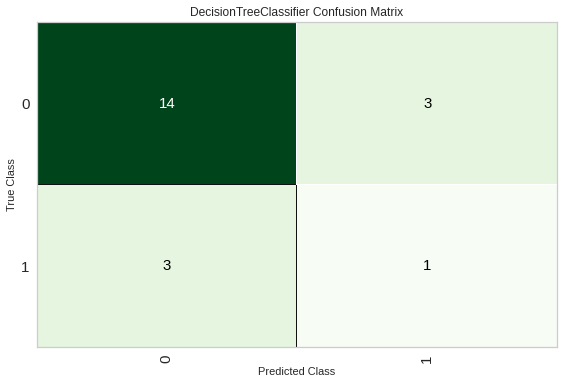

In [18]:
# plot_model(estimator=rf,plot = 'auc')
plot_model(dt, plot = 'confusion_matrix')

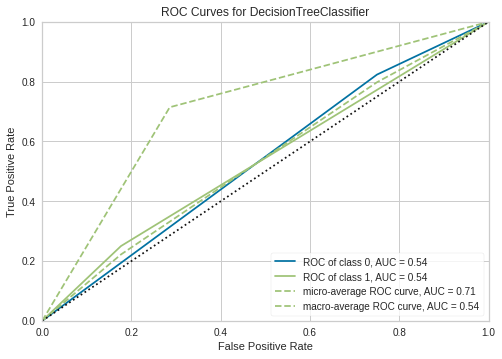

In [19]:
plot_model(estimator=dt,plot = 'auc')

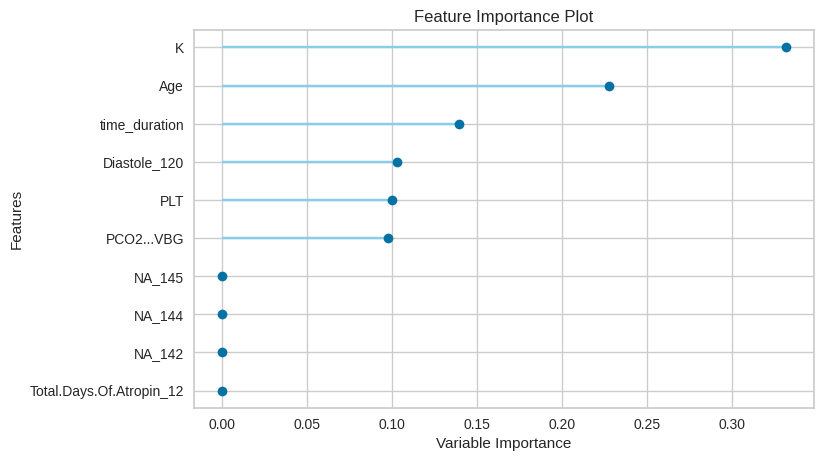

In [20]:
plot_model(dt, plot = 'feature')

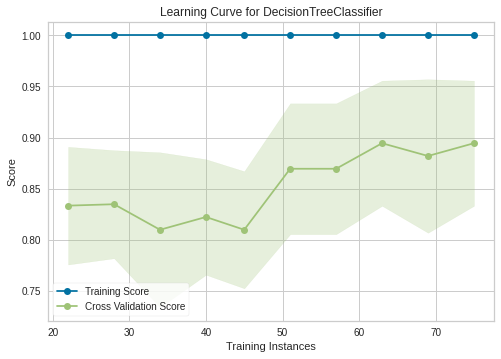

In [21]:
evaluate_model(dt)